In [32]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [33]:
dataType='val2017'
annFile="annotations/instances_{}.json".format(dataType)

In [34]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.42s)
creating index...
index created!


In [35]:
COCO_CLASSES_LIST = [
    'unlabeled',
    'person',
    'bicycle',
    'car',
    'motorcycle',
    'airplane',
    'bus',
    'train',
    'truck',
    'boat',
    'traffic light',
    'fire hydrant',
    'street sign',
    'stop sign',
    'parking meter',
    'bench',
    'bird',
    'cat',
    'dog',
    'horse',
    'sheep',
    'cow',
    'elephant',
    'bear',
    'zebra',
    'giraffe',
    'hat',
    'backpack',
    'umbrella',
    'shoe',
    'eye glasses',
    'handbag',
    'tie',
    'suitcase',
    'frisbee',
    'skis',
    'snowboard',
    'sports ball',
    'kite',
    'baseball bat',
    'baseball glove',
    'skateboard',
    'surfboard',
    'tennis racket',
    'bottle',
    'plate',
    'wine glass',
    'cup',
    'fork',
    'knife',
    'spoon',
    'bowl',
    'banana',
    'apple',
    'sandwich',
    'orange',
    'broccoli',
    'carrot',
    'hot dog',
    'pizza',
    'donut',
    'cake',
    'chair',
    'couch',
    'potted plant',
    'bed',
    'mirror',
    'dining table',
    'window',
    'desk',
    'toilet',
    'door',
    'tv',
    'laptop',
    'mouse',
    'remote',
    'keyboard',
    'cell phone',
    'microwave',
    'oven',
    'toaster',
    'sink',
    'refrigerator',
    'blender',
    'book',
    'clock',
    'vase',
    'scissors',
    'teddy bear',
    'hair drier',
    'toothbrush',
]

In [16]:
COCO_CLASSES_SET = set(COCO_CLASSES_LIST)

COCO_CLASS_ID = {
    cls_name: idx for idx, cls_name in enumerate(COCO_CLASSES_LIST)
}

In [59]:
COCO_VEHICLES = [3, 4, 6, 8]
COCO_LABELS = { 3: 'car', 4:'motorcycle', 6:'bus', 8:'truck' }

In [67]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)
for cat in catIds: 
    imgIds = coco.getImgIds(catIds=cat)
    imgIds = coco.getImgIds(imgIds = [324158])

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=catIds)

anns = coco.loadAnns(anns_ids)
print(anns)
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[1, 18, 41]
[{'segmentation': [[216.7, 211.89, 216.16, 217.81, 215.89, 220.77, 215.89, 223.73, 217.77, 225.35, 219.12, 224.54, 219.12, 220.5, 219.66, 217.27, 219.93, 212.7, 220.46, 207.85, 219.66, 203.01, 218.85, 198.43, 217.77, 195.74, 216.7, 194.93, 215.62, 190.62, 215.62, 186.59, 214.27, 183.89, 211.85, 184.16, 211.85, 187.66, 210.24, 187.66, 209.16, 184.97, 207.81, 183.36, 205.12, 186.59, 205.12, 189.28, 201.08, 192.78, 199.74, 195.2, 196.78, 200.04, 196.51, 203.01, 198.12, 205.43, 197.32, 209.2, 196.78, 213.23, 197.05, 218.89, 199.74, 221.85, 201.62, 225.35, 201.62, 233.69, 201.08, 236.11, 202.97, 236.38, 204.85, 236.11, 204.58, 232.34, 203.78, 228.85, 205.39, 233.15, 207.81, 235.57, 208.62, 234.23, 206.74, 231.27, 205.12, 228.04, 206.74, 222.39, 208.35, 219.96, 210.77, 217.54, 211.85, 221.85, 214.54, 223.73, 212.93, 217.54, 212.93, 215.66, 215.89, 212.96, 216.16, 212.16]], 'area': 759.3375500000002, 'iscrowd': 0, 'image_id': 324158, 'bbox': [196.51, 183.36, 23.95, 53.02], 'catego

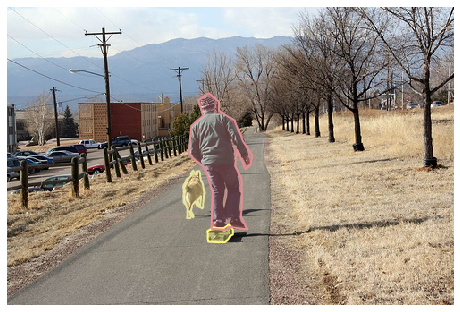

In [68]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [42]:
import cv2

img = cv2.imread('mustang.jpg')
height,width,dim  =img.shape

In [23]:
import numpy as np
import tensorflow as tf
import cv2 as cv

In [24]:
# Read the graph.
with tf.gfile.FastGFile('object detection/frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

In [70]:
import cv2
with tf.Session() as sess:
    # Restore session
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    # Read and preprocess an image.
#     img = cv.imread('mustang.jpg')
#     img = cv.imread('img1.jpg')
    img = cv.imread('object detection/image5.jpg')
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB

    # Run the model
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    
    # Visualize detected bounding boxes.
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        if classId is not None: 
            score = float(out[1][0][i])
            bbox = [float(v) for v in out[2][0][i]]
            if score > 0.6:
                x = bbox[1] * cols
                y = bbox[0] * rows
                right = bbox[3] * cols
                bottom = bbox[2] * rows
                cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)
                cv2.putText(img,str(COCO_CLASSES_LIST[classId]),(int(x), int(y)),cv2.FONT_HERSHEY_PLAIN,1.0,(125, 255, 51),1)

In [71]:
cv2.imwrite("object detection/out5.jpg", img)

True

In [65]:
print(COCO_CLASSES_LIST[1])

person


In [75]:
import cv2
with tf.Session() as sess:
    # Restore session
#     sess.graph.as_default()
#     sess.graph.as_default()
#     tf.import_graph_def(graph_def, name='')
    inputs = sess.graph.as_default()
    print(inputs)
    
    body = tf.import_graph_def('concat_stage7:0')
    
    img = cv.imread('object detection/image5.jpg')
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB
    
    output_img = sess.run(body, feed_dict={
            inputs: inp
        })
    
    print(output_img)
    
    

TypeError: graph_def must be a GraphDef proto.